# Modelling higher-dimensional cardiovascular fluid dynamics in FEniCS

### Outline:

- Navier Stokes equations
- 0D Windkessel equation
- Use case comparison
- Scalar transport equations to track solutes

## The cardiovascular system

![Cardiovascular system. Image source https://www.youtube.com/watch?v=m5Ml8rvsE5U](figures/cardiovascular_system.jpg)

## 3D, 1D, 0D, when and why?

### 3D - complex flow patterns & patient-specific simulations

![3D - complex flow patterns & patient-specific simulations](figures/patient-specific.png)

K. Valen-Sendstad, D.A. Steinman (2014) Mind the Gap: Impact of Computational Fluid Dynamics Solution Strategy on Prediction of Intracranial Aneurysm Hemodynamics and Rupture Status Indicators. _American Journal of Neuroradiology_ __35__ (3) 536-543, DOI: 10.3174/ajnr.A3793

### 1D - sections of arterial tree

![1D - large branches of arterial tree](figures/geometry.png)

![1D - large branches of arterial tree](figures/cca_p_q.png)

A.K. Diem, N.W. Bressloff (2017) VaMpy: a Python Package to solve 1D blood flow problems. _Journal of Open Research Software_ __5__ 1, DOI: 10.5334/jors.159

### 0D - outlet boundary condition

M.S. Olufsen, C.S. Peskin, W.Y. Kim, E.M. Pedersen, A. Nadim, J. Larsen Numerical simulation and experimental validation of blood flow in arteries with structured-tree outflow conditions. _Annals of Biomedical Engineering_ __28__ (11): 1281-1299, DOI: 10.1114/1.1326031

A.K. Diem, M. MacGregor Sharp, M. Gatherer, N.W. Bressloff, R.O. Carare, G. Richardson (2017) Arterial pulsations cannot drive intramural periarterial drainage: Significance for Aβ drainage. _Frontiers in Neuroscience_ __11__ 4759

## Euler equations

### Continuity equation

Suppose a fluid of density $\rho(\boldsymbol{x}, t)$. The total mass of fluid in a volume $V$ then is

$$\int_V \rho(\boldsymbol{x}, t) dV$$

The mass flux leaving $V$ via its bounding surface $S$ is

$$\int_S \rho(\boldsymbol{x}, t) \boldsymbol{u}(\boldsymbol{x}, t) \cdot \boldsymbol{n} dS$$

where $\boldsymbol{u}(\boldsymbol{x}, t)$ is the fluid velocity and $$\boldsymbol{n}$$ is the outward normal vector. The change of fluid volume over time thus is

$$\int_V \frac{\partial \rho}{\partial t} dV = - \int_S \rho \boldsymbol{u} \cdot \boldsymbol{n} dS = - \int_V \nabla \cdot (\rho \boldsymbol{u}) dV$$

This must hold for any arbitrary fluid element $dV$, so we can omit the integrals and obtain

$$\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \boldsymbol{u}) = 0$$

This equation is called the _continuity equation_. In this lecture we are only interested in considering _incompressible_ fluids, for which $\rho(\boldsymbol{x}, t) = \text{const.}$, such that the continuity equation reduces to

$$\nabla \cdot \boldsymbol{u} = 0$$

### Momentum equations

Newton's law for the movement of a particular fluid element is

$$\frac{d}{dt} \int_{V(t)} \rho \boldsymbol{u} dV = - \int_{S(t)} p \boldsymbol{n} dS + \int_{V(t)} \boldsymbol{f} dV$$

for volume $V(t)$ bounded by surface $S(t)$ with pressure $p$ and external forces (such as gravity) $\boldsymbol{f}$. Turning the surface integral into a volume integral as before

$$- \int_{S(t)} p \boldsymbol{n} dS = - \int_{V(t)} \nabla p dV$$

and expanding the total derivative $d/dt$ we obtain

$$\int_{V(t)} \rho \left(\frac{\partial \boldsymbol{u}}{\partial t} + (\boldsymbol{u} \cdot \nabla) \boldsymbol{u}\right) dV = - \int_{V(t)} \nabla p dV + \int_{V(t)} \boldsymbol{f} dV$$

Again, this must hold for any arbitrary fluid volume $dV$ such that we arrive at

$$\rho \left(\frac{\partial \boldsymbol{u}}{\partial t} + (\boldsymbol{u} \cdot \nabla) \boldsymbol{u}\right) = - \nabla p + \boldsymbol{f}$$

This set of equations (one for each direction of $\boldsymbol{x} = (x_1, x_2, x_3)$) is called the _momentum equations_ and together with the continuity equation constitute Euler's equations.

## Navier-Stokes equations

### Viscosity

The Euler equations do not account for _viscosity_ and thus only hold for _inviscid_ fluids. To take into account viscosity of a fluid we return to a discussion about stress using the stress tensor $\sigma$. For any fluid element the net force arising from surface stresses translates to a volume stress by

$$\int_S \sigma \cdot \boldsymbol{n} dS = \int_V (\nabla \cdot \sigma) dV$$

What does $\sigma$ look like? Stress is composed of _normal_ and _tangential_ stresses. Normal stress is just given by $p$, so for an inviscid fluid the stress tensor is

$$\sigma = \begin{pmatrix} 
-p & 0 & 0\\
0 & -p & 0\\
0 & 0 & -p
\end{pmatrix} = - p \boldsymbol{I}$$ 

Viscosity on the other hand is a tangential stress and acts to reduce strain in the fluid. We thus have 

$$\sigma = - p \boldsymbol{I} + \begin{pmatrix} 
\sigma_{11} & \sigma_{12} & \sigma_{13}\\
\sigma_{12} & \sigma_{22} & \sigma_{23}\\
\sigma_{13} & \sigma_{23} & \sigma_{33}
\end{pmatrix}$$ 

Notice that $\sigma$ is _symmetric_ and must relate to strain $\epsilon(\boldsymbol{u})$ acting on the fluid and the viscosity $\mu$ of the fluid. In fact, for Newtonian fluids we have

$$\sigma(\boldsymbol{u}, p) = 2 \mu \epsilon(\boldsymbol{u}) - p \boldsymbol{I}$$

Strain is given by

$$\epsilon(\boldsymbol{u}) = \frac{1}{2} \left( \frac{\partial u_j}{\partial i} - \frac{\partial u_i}{\partial j} \right) = \frac{1}{2} \left( \nabla u + (\nabla u)^T \right)$$

The momentum equations including viscous effects are thus

$$\rho \left( \frac{\partial \boldsymbol{u}}{\partial t} + \boldsymbol{u} \cdot \nabla \boldsymbol{u} \right) = \nabla \cdot \sigma(\boldsymbol{u}, p) + \boldsymbol{f}$$

and expanded

$$\rho \left( \frac{\partial \boldsymbol{u}}{\partial t} + \boldsymbol{u} \cdot \nabla \boldsymbol{u} \right) = - \nabla p + - \mu \nabla^2 \boldsymbol{u} + \boldsymbol{f}$$

Together with the continuity equation these equations are called the Navier-Stokes equations.

The Navier-Stokes equations are very simple to implement in FEniCS. For illustration purposes we will stick to a 2D coordinate system with $\boldsymbol{x} = (x, y)$. First, we look at flow through an ideal artery and afterwards we will examine what happends to arterial flow during stenosis, i.e. the pathological narrowing of a blood vessel due to, for example, the build up of plaques (atherosclerosis). 

Start by activating the matplotlib magic, importing all the necessary modules and setting some output parameter:

In [1]:
%matplotlib inline

from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt

parameters["std_out_all_processes"] = False

We build the geometry using some built-in functions in FEniCS and use the mshr library to generate the mesh.

In [2]:
channel = Rectangle(Point(0, 0), Point(5.0, 0.4))
mesh = generate_mesh(channel, 32)

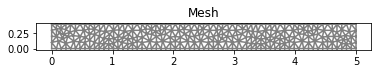

In [3]:
plot(mesh, title='Mesh')

Defining parameters

In [4]:
T = 3.0                 # final time
num_steps = int(1000*T) # number of time steps
dt = T/num_steps        # time step size
mu = 0.003              # dynamic viscosity
rho = 1                 # density

We need separate function spaces for the momentum and continuity equations. Notice that the momentum equation evaluates vectors, while the continuity equation evaluates scalars. P2-P1 is a typical choice of finite elements for the Navier-Stokes equations.

In [5]:
# Define function spaces
V = VectorFunctionSpace(mesh, 'P', 2)
Q = FunctionSpace(mesh, 'P', 1)

The boundaries for this example are defined as

In [6]:
# Define boundaries
inflow   = 'near(x[0], 0.0)'
outflow  = 'near(x[0], 5.0)'
walls    = 'near(x[1], 0) || near(x[1], 0.4)'

At the inflow boundary we apply a parabolic velocity profile

$$\boldsymbol{u}(0, y) = 4.0 \cdot \frac{1.5 \cdot y  \cdot (0.41 - y)}{0.41^2} \qquad \text{on } \Gamma_{\text{inflow}}$$

In [7]:
# Define inflow profile
inflow_profile = Expression("sin(3.0*tt)", tt=0.0, degree=2)
bcp_inflow = DirichletBC(Q, inflow_profile, inflow)

_What would happen if we applied another velocity profile, for example_ 

$$\boldsymbol{u}(0, y) = u_0$$

_(flat profile)?_ 

At the outlet boundry we apply zero pressure

$$p = 0 \qquad \text{on } \Gamma_{\text{outflow}}$$

At all other boundaries we set

$$\boldsymbol{u} = 0 \qquad \text{on } \Gamma_{\text{wall,cylinder}}$$

Finally we collect all velocity boundary conditions in one list and pressure boundary conditions in another

In [8]:
# Other boundary conditions
bcp_outflow = DirichletBC(Q, Constant(0), outflow)
bcu_walls = DirichletBC(V, Constant((0, 0)), walls)

# Collect boundary conditions for each equation
bcu = [bcu_walls]
bcp = [bcp_inflow, bcp_outflow]

Next, we define our variational form. The Navier-Stokes equations are a nonlinear system of equations with some special features and thus requires special techniques to be solved efficiently. We use a _splitting method_ called incremental pressure correction scheme (IPCS) to first calculate a tentative velocity $u^*$ using $p^n$ from the previous time step, then use $u^*$ to update $p^n$ and finally obtain the new $u$. The tentative velocity $u^*$ is obtained by advancing the momentum equation by a midpoint finite difference scheme in time.

For readability we will from now on just write $u$ for $\boldsymbol{u}$, $f$ for $\boldsymbol{f}$, $k = \Delta t$ and use the short-hand notation

$$\left\langle u, v \right\rangle = \int_{\Omega} u v dx$$

and

$$\left\langle u, v \right\rangle_{\partial \Omega} = \int_{\partial \Omega} u v ds$$

Furthermore we define the half time-step

$$u^{n+1/2} \approx \frac{u^{n+1} + u^n}{2}$$

Setting up (trial/test) functions in FEniCS and functions for $\sigma$ and $\epsilon$.

In [9]:
# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

# Define functions for solutions at previous (u_n/p_n) and
# current (u_/p_) time steps
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

# Define expressions used in variational forms
U  = 0.5*(u_n + u)
n  = FacetNormal(mesh)
f  = Constant((0, 0))
k  = Constant(dt)
mu = Constant(mu)
rho = Constant(rho)

# Define symmetric gradient
def epsilon(u):
    return sym(nabla_grad(u))

# Define stress tensor
def sigma(u, p):
    return 2*mu*epsilon(u) - p*Identity(len(u))

The tentative velocity $u^*$ is calculated by solving the variational form

$$\left\langle \rho (u^* - u^n)/k, v \right\rangle + \left\langle \rho u^n \cdot \nabla u^n, v \right\rangle + \left\langle \sigma(u^{n+1/2}, p^n), \epsilon(v) \right\rangle + \left\langle p^n \cdot n, v \right\rangle_{\partial \Omega} - \left\langle \mu \nabla u^{n+1/2} \cdot n, v \right\rangle_{\partial \Omega} = \left\langle f^{n+1}, v \right\rangle$$

In [10]:
# Define variational problem for step 1
F1 = rho*dot((u - u_n) / k, v)*dx \
   + rho*dot(dot(u_n, nabla_grad(u_n)), v)*dx \
   + inner(sigma(U, p_n), epsilon(v))*dx \
   + dot(p_n*n, v)*ds - dot(mu*nabla_grad(U)*n, v)*ds \
   - dot(f, v)*dx
a1 = lhs(F1)
L1 = rhs(F1)

The second step is to compute a new pressure $p^n$ by solving

$$\left\langle \nabla p^{n+1}, \nabla q \right\rangle = \left\langle \nabla p^n, \nabla q \right\rangle - \frac{1}{k} \left\langle \nabla \cdot u^*, q \right\rangle$$

In [11]:
# Define variational problem for step 2
a2 = dot(nabla_grad(p), nabla_grad(q))*dx
L2 = dot(nabla_grad(p_n), nabla_grad(q))*dx - (1/k)*div(u_)*q*dx

The last step is to compute the corrected velocity $u^{n+1}$ by solving

$$\left\langle u^{n+1}, v \right\rangle = \left\langle u^*, v \right\rangle - k \left\langle \nabla (p^{n+1} - p^n), v \right\rangle$$

In [12]:
# Define variational problem for step 3
a3 = dot(u, v)*dx
L3 = dot(u_, v)*dx - k*dot(nabla_grad(p_ - p_n), v)*dx

A view more snippets of code are required to build a time-stepping loop to solve the equations. In this case the left-hand side of the finite element method

$$a(u, v) = L(v)$$

won't change over time, so the corresponding matrices can be assembled just once before the time-stepping loop. The right-hand sides are assembled in the same way (and boundary conditions are applied), but this has to be done during every time step

In [13]:
# Assemble matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

# Apply boundary conditions to matrices
[bc.apply(A1) for bc in bcu]
[bc.apply(A2) for bc in bcp]

[None, None]

We also need to set up files to store the results in

In [15]:
# Create XDMF files for visualization output
xdmffile_u = XDMFFile('results/velocity.xdmf')
xdmffile_p = XDMFFile('results/pressure.xdmf')

# To store results during a time step use
t = 0.0
xdmffile_u.write_checkpoint(u_, 'u', t)
xdmffile_p.write_checkpoint(p_, 'p', t)

## Visualisation

We use Paraview for the visualisation.

## Exercise: Flow through an ideal artery

_Implement the time-stepping loop for the ideal artery geometry we built at the start of the notebook._

_Modify your code to use a flat velocity profile at the inlet, i.e._

$$u(0, y) = \text{const.}$$

_How does this compare to your initial prediction?_

## Exercise: Stenosis

_Modify the geometry from the previous exercise to include stenosis. The easiest way to achieve this is to define a circle using mshr_

In [18]:
circle = Circle(Point(3, -0.5), 0.7)

_and then subtract the circle from the channel before generating the mesh. Run the same simulation on this modified geometry. How does stenosis affect arterial blood flow in this simplified model?_

## Scalar transport equations

Blood transports oxygen and other nutrients through the body, so naturally one might ask the question of how nutrients are distributed. This can be done using the scalar transport equation

$$\frac{\partial c}{\partial t} + \boldsymbol{u} \cdot \nabla c - \nabla \cdot (D \nabla c) = f - rc$$

where $c$ is the concentration of the nutrient of interest, $\boldsymbol{u}$ is the fluid velocity from our previous simulation, $D$ is the diffusion coefficient for the nutrient, $f$ is a source term as before and $r$ is a rate constant to, for example, describe the uptake of the nutrient into the tissue.

The variational formulation for the scalar transport equation is (with trial function $w$)

$$\left<(c^{n+1} - c^n)/k, v\right> + \left<\boldsymbol{u} \cdot \nabla c^{n+1}, v\right> + \left<D \nabla c^{n+1}, \nabla v\right> - \left<f, v\right> + \left<r c^{n+1}, v\right> = 0$$

Here, we assume homogeneous Neumann, ie $\partial c/\partial n = 0$ and thus they vanish when integrating by parts to obtain the variational form.

The scalar transport equation is a nonlinear equation, but unlike the Navier-Stokes equations, we don't have a splitting scheme to linearise the equation. Hence solving for scalar transport requires a slightly different solver syntax:

In [ ]:
solve(F == 0, c, bcs=bcs)

_Implement the variational form of the scalar transport equation using boundary conditions of your choice on one of the previous geometries._

You can load previous results of $\boldsymbol{u}$ into your simulation using

In [ ]:
xdmffile_u.read_checkpoint(u, 'u', i)

Notice that here, i is a integer indicating the index of the time step rather than the time itself as in the write_checkpoint() function.